# Introduction to NN Classification with Tensorflow

## Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles

n_samples = 1000

# Create circles
X, y = make_circles(n_samples=n_samples, noise= 0.03, random_state=42)

In [2]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [3]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [4]:
# Visualize visualize visualize

import pandas as pd
circles = pd.DataFrame({"X0": X[:,0], "X1": X[:,1], "Label":y})
circles

,X0,X1,Label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


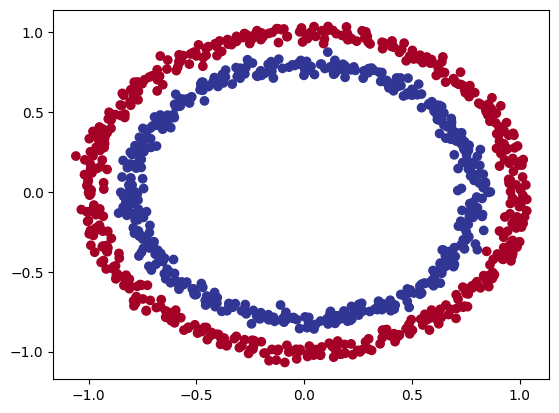

In [5]:
#Visualize with a plot

import matplotlib.pyplot as plt

plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

## Inputs and output shapes

In [6]:
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

In [8]:
len(X), len(y)

(1000, 1000)

## Steps in modelling in Tensorflow

* 1. Create the model
* 2. Compile the model
* 3. Fit the model
* 4. Evaluate the model

In [9]:
import tensorflow as tf

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics = ["accuracy"])

model_1.fit(X, y, epochs = 200)

Epoch 1/200


2024-05-02 13:03:03.222067: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-05-02 13:03:03.222085: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-05-02 13:03:03.222091: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-05-02 13:03:03.222110: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-05-02 13:03:03.222121: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2024-05-02 13:03:03.397899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4680 - loss: 6.0683
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - loss: 7.6996
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5170 - lo

In [10]:
model_1.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5045 - loss: 7.8989


[7.971191883087158, 0.5]

## Improving our Model

In [11]:
tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),#, activation="relu"),
    tf.keras.layers.Dense(10),#, activation="relu"),
    tf.keras.layers.Dense(1)#, activation="softmax")
])

model_3.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

model_3.fit(X,y,epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.4476 - loss: 3.3911
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4767 - loss: 0.7285
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5166 - loss: 0.6937
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4573 - loss: 0.6960
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4463 - loss: 0.6969
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4510 - loss: 0.6973
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4496 - loss: 0.6978
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4530 - loss: 0.6982
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4486 - loss: 0.6986
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4507 - loss: 0.6990
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4537 - loss: 0.6994
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc

In [12]:
model_3.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5136 - loss: 0.6914


[0.6955238580703735, 0.49300000071525574]

In [13]:
model_3.predict(X)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


array([[0.52655905],
       [0.45661253],
       [0.45435756],
       [0.48440686],
       [0.4886011 ],
       [0.4801745 ],
       [0.50392747],
       [0.52557   ],
       [0.46313372],
       [0.50366324],
       [0.4470106 ],
       [0.5311685 ],
       [0.4998141 ],
       [0.5137121 ],
       [0.50230896],
       [0.48002586],
       [0.43793845],
       [0.47563812],
       [0.44838712],
       [0.4427735 ],
       [0.5254181 ],
       [0.48018616],
       [0.46554068],
       [0.52689576],
       [0.45612562],
       [0.44941235],
       [0.5212326 ],
       [0.52168006],
       [0.4827239 ],
       [0.50748014],
       [0.45421606],
       [0.49842572],
       [0.5045089 ],
       [0.5332697 ],
       [0.46094343],
       [0.46643466],
       [0.4739338 ],
       [0.52289313],
       [0.4837296 ],
       [0.5348017 ],
       [0.4442024 ],
       [0.52374136],
       [0.4409101 ],
       [0.5201693 ],
       [0.43756014],
       [0.43897283],
       [0.49433348],
       [0.514

## Let's create a function to create a visual boundary

In [32]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))

  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html

  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)

  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

In [33]:
model_3.output_shape[-1]

1

  1/313 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step
doing binary classifcation...


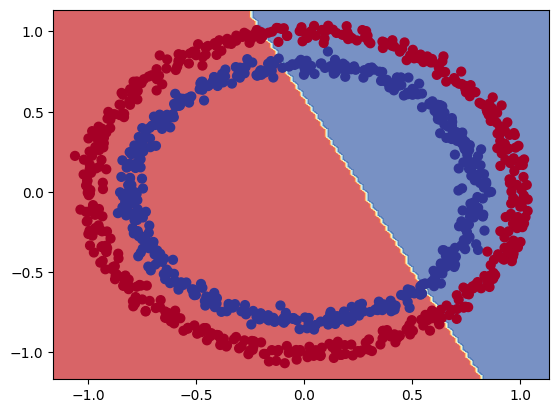

In [34]:
# Check out the predictions our model is making
plot_decision_boundary(model_3, X, y)

In [ ]:
### Let's see if our model can predict on regression data:

In [41]:
# Let's see if our model can predict on regression data:

# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# We had to change the model because it was Binary Classification. So now building one for linear regression.
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model_4.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])
model_4.fit(tf.expand_dims(X_reg_train,-1), y_reg_train, epochs = 100)

Epoch 1/100


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 335.0228 - mae: 335.0228
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 180.1806 - mae: 180.1806
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 51.9701 - mae: 51.9701
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 90.3011 - mae: 90.3011
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 73.9401 - mae: 73.9401 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 44.2435 - mae: 44.2435 
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 50.5573 - mae: 50.5573 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 42.6222 - mae: 42.6222 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 45.1912 - mae: 45.1912 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.7020 - mae: 40.7020 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.5239 - mae: 40.5239 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 40.3511 - mae: 40.3511 
Epoch 13/100
5/5 ━━━━━━━━━━━━━━━━

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


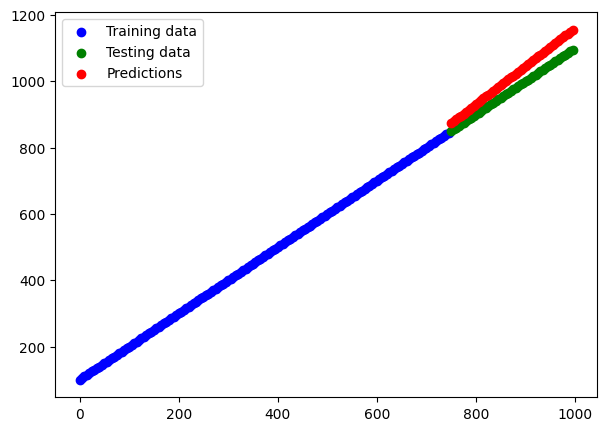

In [44]:
# Make predictions with our trained model:

y_reg_pred = model_4.predict(X_reg_test)

plt.figure(figsize=(7,5))
plt.scatter(X_reg_train,y_reg_train, c="b", label = "Training data")
plt.scatter(X_reg_test,y_reg_test, c="g", label = "Testing data")
plt.scatter(X_reg_test,y_reg_pred, c="r", label = "Predictions")
plt.legend()

### The missing piece: Non-linearity

In [58]:
tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation="linear")
])

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(X, y, epochs = 100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.4895 - loss: 0.7480
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4900 - loss: 0.7451
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4900 - loss: 0.7423
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4891 - loss: 0.7397
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4902 - loss: 0.7372
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 0.7347
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4918 - loss: 0.7324
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4909 - loss: 0.7302
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4909 - loss: 0.7282
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4899 - loss: 0.7262
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4889 - loss: 0.7243
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy

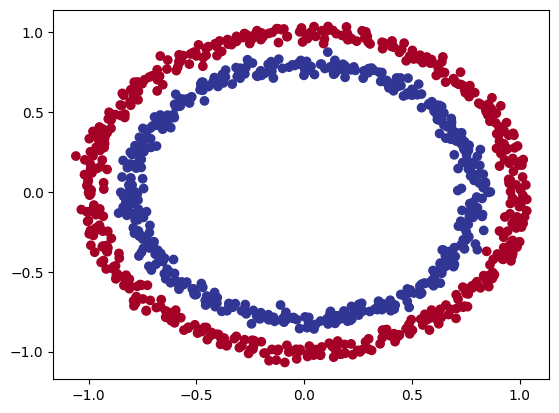

In [53]:
plt.scatter(X[:,0], X[:,1], c = y, cmap= plt.cm.RdYlBu);

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 672us/step
doing binary classifcation...


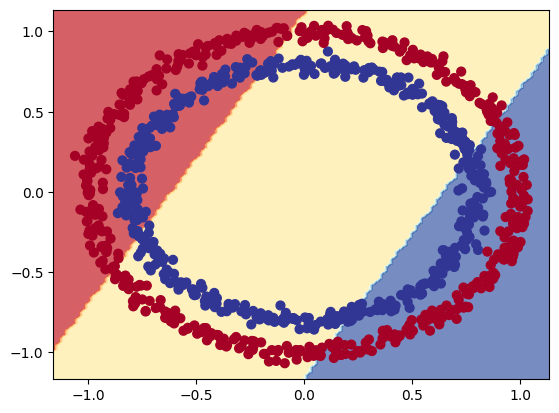

In [57]:
# Check the decision boundary for our latest model

plot_decision_boundary(model_5, X, y)

### Let's try to build with a nonlinear activation function

In [72]:
# Change activation function,
# Change number of hidden layers and hidden units
# Change learning rate

tf.random.set_seed(42)

model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(5, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(5, activation= tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation= tf.keras.activations.sigmoid)  # relu also seems to work pretty well
])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

model_5.compile(loss = tf.keras.losses.BinaryCrossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
                metrics = ["accuracy"])

history = model_5.fit(X, y, epochs = 200, callbacks= [callback])

Epoch 1/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.4969 - loss: 0.6987
Epoch 2/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5073 - loss: 0.6969
Epoch 3/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5038 - loss: 0.6958
Epoch 4/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4890 - loss: 0.6950
Epoch 5/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5045 - loss: 0.6943
Epoch 6/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5051 - loss: 0.6939
Epoch 7/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4972 - loss: 0.6937
Epoch 8/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4997 - loss: 0.6935
Epoch 9/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4954 - loss: 0.6933
Epoch 10/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4910 - loss: 0.6930
Epoch 11/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4930 - loss: 0.6928
Epoch 12/200
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accurac

In [73]:
model_5.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9976 - loss: 0.0921


[0.08838456124067307, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step
doing binary classifcation...


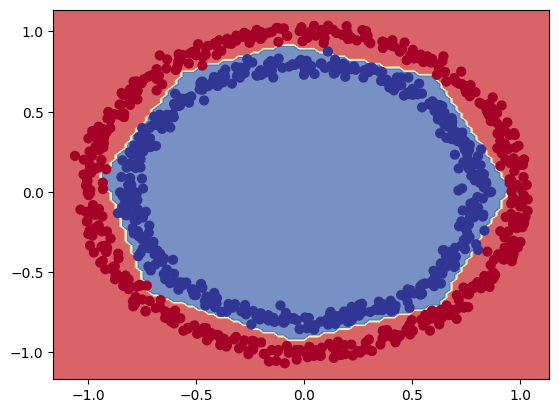

In [74]:
plot_decision_boundary(model_5,X,y)

## YAY!

### Now discuss non-linear activation functions from scratch

In [75]:
# Create a toy tensor (similar to the data we pass into our model)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

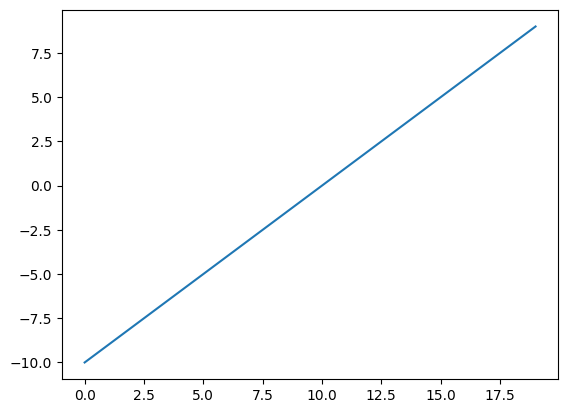

In [76]:
# Visualize our toy tensor
plt.plot(A);

In [77]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.53978682e-05, 1.23394580e-04, 3.35350138e-04, 9.11051175e-04,
       2.47262325e-03, 6.69285096e-03, 1.79862101e-02, 4.74258736e-02,
       1.19202934e-01, 2.68941432e-01, 5.00000000e-01, 7.31058598e-01,
       8.80797148e-01, 9.52574134e-01, 9.82013762e-01, 9.93307173e-01,
       9.97527421e-01, 9.99089003e-01, 9.99664664e-01, 9.99876618e-01],
      dtype=float32)>

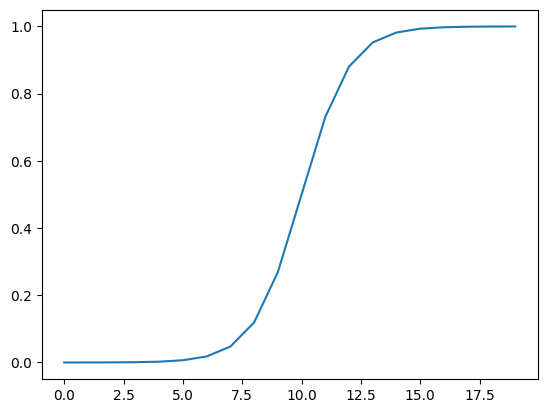

In [78]:
# Plot our toy tensor transformed by sigmoid

plt.plot(sigmoid(A))

#### He also tried to replicate Relu and others activations, i just watched the video and in case you can see his jupyter notebook.

### --------------------------------------------------------------------------------------------------------------------------------

### Evaluating and improving our model

In [79]:
len(X)

1000

In [81]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [82]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [148]:
# Create the model

tf.random.set_seed(42)

model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

callback = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience=3)

model_6.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ["accuracy"])

history_6 = model_6.fit(X_train, y_train, epochs = 50, callbacks = [callback])


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.4783 - loss: 0.7095
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4500 - loss: 0.6963
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4805 - loss: 0.6945
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5138 - loss: 0.6931
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5255 - loss: 0.6929
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5216 - loss: 0.6923
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5522 - loss: 0.6912
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6038 - loss: 0.6893
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6332 - loss: 0.6854
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6590 - loss: 0.6776
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6644 - loss: 0.6670
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6957 

In [149]:
model_6.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9439 - loss: 0.1372


[0.13656985759735107, 0.9449999928474426]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


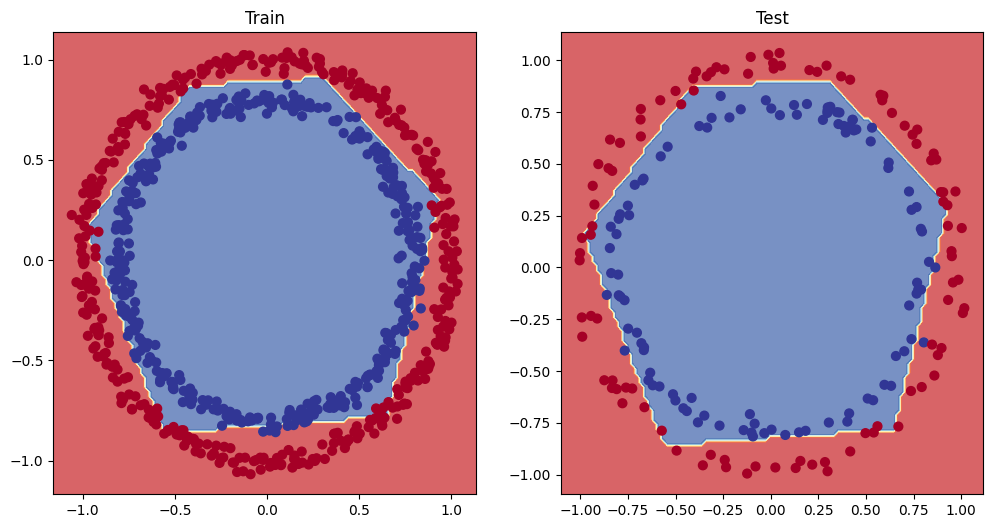

In [150]:
# Plot the decision boundaries for the training and test sets

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_6,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_6,X_test, y_test)

In [111]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.46750,0.698060
1,0.49500,0.688317
2,0.55375,0.681198
3,0.57750,0.671733
4,0.59500,0.659815
5,0.62875,0.644058
6,0.67375,0.625764
7,0.69750,0.605539
8,0.69625,0.586111
9,0.71625,0.566315


Text(0.5, 1.0, 'Model loss curves')

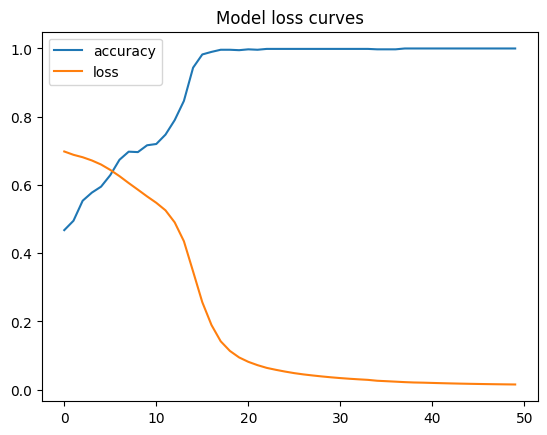

In [113]:
# Plot the loss (or training) curves

# could also be done with:
# plt.plot(history.history["accuracy"])
# plt.plot(history.history["loss"])
# plt.title("Model loss curves")

pd.DataFrame(history.history).plot()
plt.title("Model loss curves")

### Using a different callback: LearningRateScheduler

In [139]:
tf.random.set_seed(42)

model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20)) # This means that for every epoch we update the learning rate by 10^(epoch_number/20)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "loss", patience = 3)

model_7.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate= 0.01),
                metrics = ["accuracy"])

history_7 = model_7.fit(X_train, y_train, epochs = 100, callbacks = [lr_scheduler])#, early_stopping])   # This was commented to find the learning rate in the graph of Learning rate vs Loss.

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.5026 - loss: 0.6986 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5031 - loss: 0.6983 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5031 - loss: 0.6980 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5031 - loss: 0.6978 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5009 - loss: 0.6974 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4976 - loss: 0.6971 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4920 - loss: 0.6968 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4936 - loss: 0.6964 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4906 - loss: 0.6960 - l

<Axes: xlabel='epochs'>

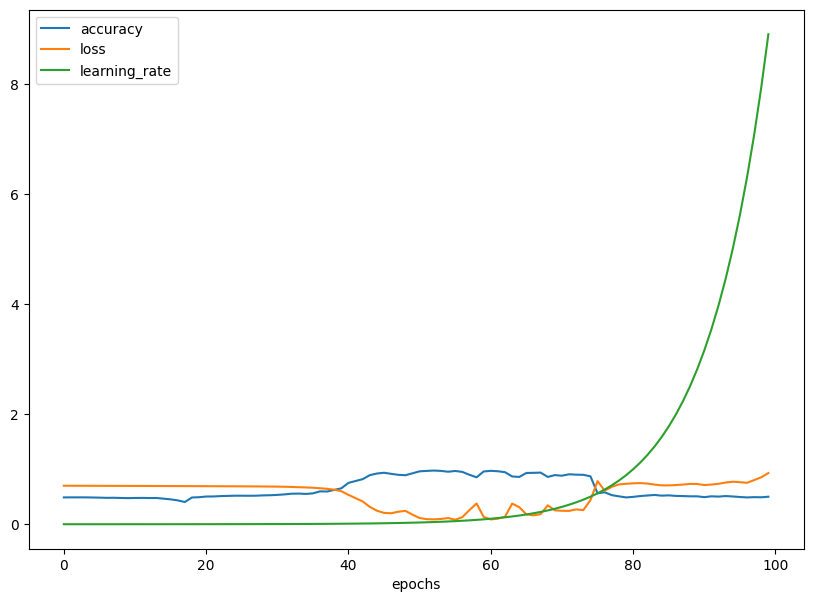

In [140]:
pd.DataFrame(history_7.history).plot(figsize=(10,7), xlabel = "epochs")

Text(0.5, 1.0, 'Learning rate vs Loss')

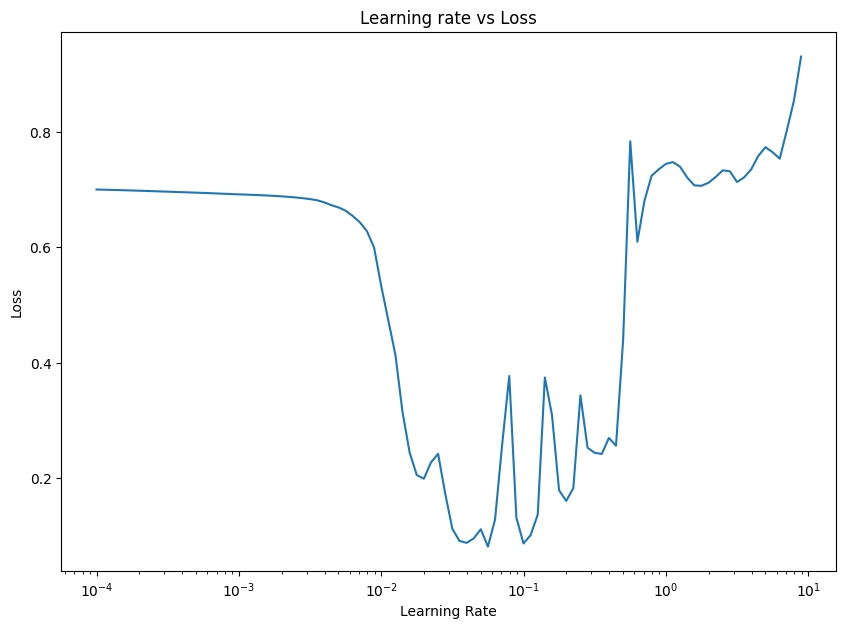

In [141]:
# Plot the learning rate versus the loss

lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10,7))
plt.semilogx(lrs, history_7.history['loss'])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Learning rate vs Loss")

## Fitting a model with the ideal learning rate

In [143]:
tf.random.set_seed(42)

model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_8.compile(loss = tf.keras.losses.binary_crossentropy,
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ["accuracy"])

history_8 = model_8.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.4629 - loss: 0.7014
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4998 - loss: 0.6883
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5752 - loss: 0.6781
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6004 - loss: 0.6620
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6620 - loss: 0.6348
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6967 - loss: 0.5862
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7456 - loss: 0.5190
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7699 - loss: 0.4881
Epoch 9/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7982 - loss: 0.4503
Epoch 10/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.8157 - loss: 0.4266
Epoch 11/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8368 - loss: 0.4090
Epoch 12/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8376 

In [152]:
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9455 - loss: 0.1789


[0.20793315768241882, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
doing binary classifcation...


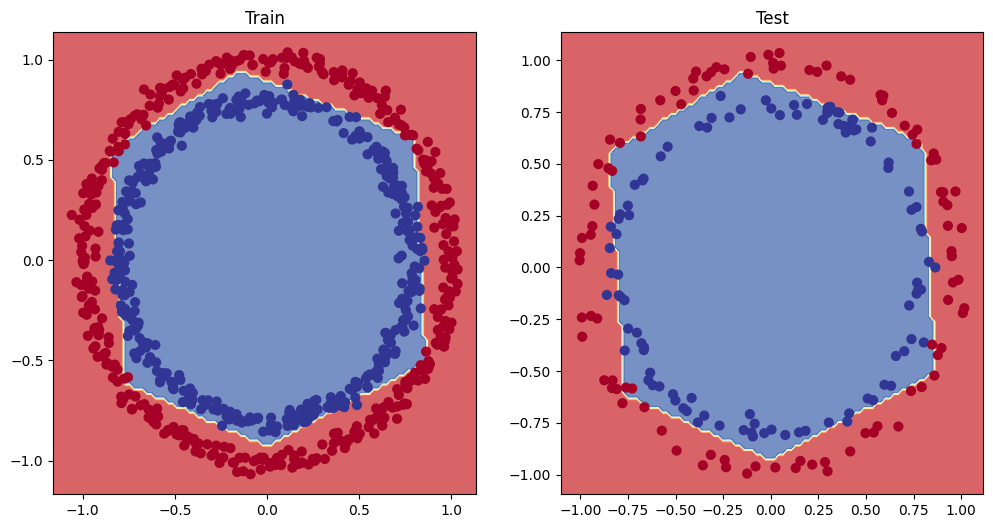

In [153]:
# Plot the decision boundaries

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_8,X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_8,X_test, y_test)

## More classification evaluation methods

In [163]:
# Check the accuracy of our model

loss, accuracy = model_8.evaluate(X_test, y_test)
print(F"Model loss on test set: {loss} ")
print(F"Model accuracy on test set: {(accuracy*100):.2f} ")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9455 - loss: 0.1789 
Model loss on test set: 0.20793315768241882 
Model accuracy on test set: 93.50 


In [168]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)

confusion_matrix(y_test,tf.round(y_preds))

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([[94,  6],
       [ 7, 93]])

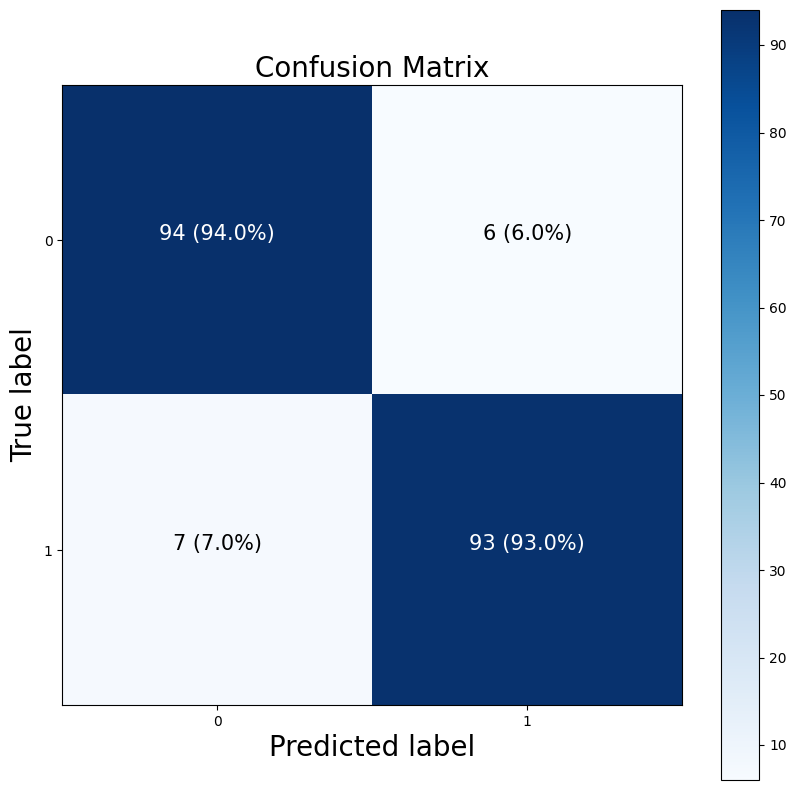

In [173]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
  labels = classes
else:
  labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)

### ------------------------------------------------------------------------------------------------------------------------------------------------

# Working with a larger example: Multiclass Classification

In [176]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and testing data

(train_data, train_labels), (test_data,test_labels) = fashion_mnist.load_data()

In [179]:
print(f"Show first training example: {train_data[0]} \n")
print(f"Show first training example: {train_labels[0]} \n")

Show first training example: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0  

In [180]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

(<matplotlib.image.AxesImage at 0x148c70bb0>, 3)

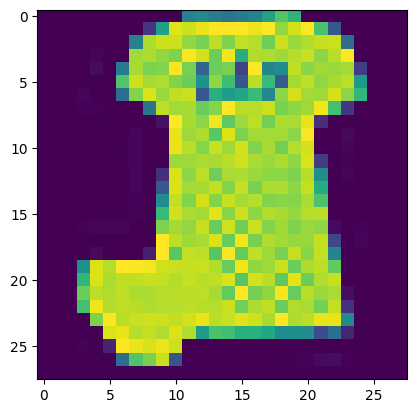

In [186]:
# Plot a sing sample

import matplotlib.pyplot as plt

plt.imshow(train_data[70]), (train_labels[70])

In [188]:
# Create a list so the labels are readable

# you can find the dataset and labels meaning in: 
# https://github.com/zalandoresearch/fashion-mnist

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

len(class_names)

10

Text(0.5, 1.0, 'Bag')

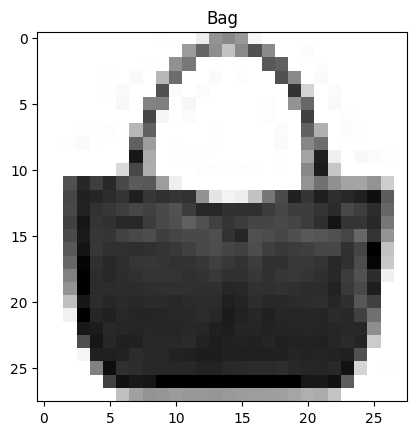

In [192]:
index_of_choice = 100

plt.imshow(train_data[index_of_choice], cmap= plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

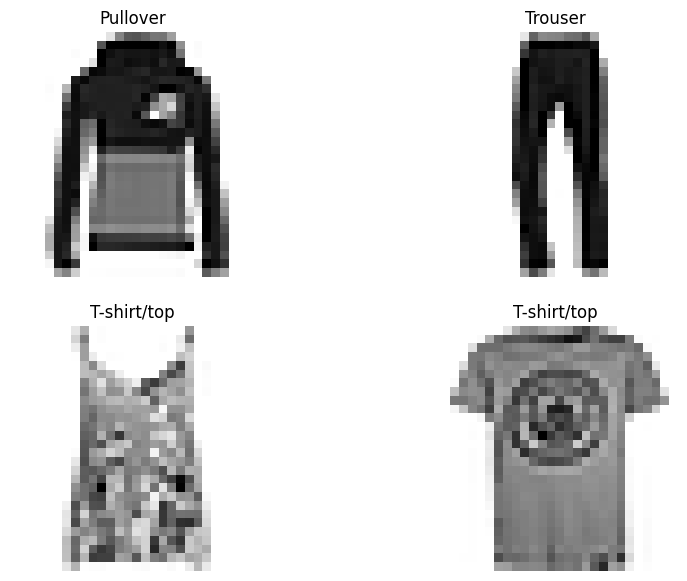

In [196]:
# Plot multiple random images of Fashion Mnist

import random

plt.figure(figsize=(10,7))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    random_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[random_index], cmap = plt.cm.binary)
    plt.title(class_names[train_labels[random_index]])
    plt.axis(False)

## Building a multiclass classification model

In [200]:
# Shape of inputs and outputs
train_data[0].shape, len(class_names)

((28, 28), 10)

In [209]:
flatten_model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape = (28,28))])
flatten_model.output_shape

/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


(None, 784)

In [211]:
train_labels[0:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [213]:
# Classification model

tf.random.set_seed(42)

model_11 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape= (28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_11.compile(loss = "SparseCategoricalCrossentropy",   #CategoricalCrossentropy must use labels in one hot encoded, for integers type we need SparseCategoricalCrossentropy
                 optimizer = "Adam",
                 metrics = ["accuracy"])

non_norm_hist = model_11.fit(train_data, 
                             train_labels, # if using CategoricalCrossentropy we could have one hot encoded like: tf.one_hot(train_labels, depth =10)
                             epochs = 10,
                             validation_data = (test_data, test_labels)) # tf.one_hot(test_labels, depth =10)

Epoch 1/10


/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.1016 - loss: 4.3326 - val_accuracy: 0.1000 - val_loss: 2.3036
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.0986 - loss: 2.3031 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.0988 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3033
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.0987 - loss: 2.3028 - val_accuracy: 0.1000 - val_loss: 2.3028
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.1285 - loss: 2.2390 - val_accuracy: 0.2705 - val_loss: 1.8422
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.2759 - loss: 1.7725 - val_accuracy: 0.3059 - val_loss: 1.6298
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3085 - loss: 1.6139 - val_accuracy: 0.3258 - val_loss: 1.5732
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.3202 - loss: 1.5637 - v

In [214]:
# Check the model summary

model_11.summary()

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_7 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_130 (Dense)               │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_131 (Dense)               │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_132 (Dense)               │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [215]:
# Check the min and max of the training data

train_data.min(), train_data.max()

(0, 255)

In [218]:
# We want to normalize this data.

# We can get the training data and testing data between 0 and 1 by dividing by the maximum.

train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [219]:
# Now lets build a model with the normalized data:

tf.random.set_seed(42)  # For reproducibility

model_12 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "softmax")
])
model_12.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

norm_history = model_12.fit(train_data_norm,
                            train_labels,
                            epochs = 10,
                            validation_data = (test_data_norm, test_labels))

/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.5201 - loss: 1.2555 - val_accuracy: 0.7525 - val_loss: 0.7078
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.7674 - loss: 0.6704 - val_accuracy: 0.7916 - val_loss: 0.6100
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8000 - loss: 0.5879 - val_accuracy: 0.8034 - val_loss: 0.5758
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8104 - loss: 0.5594 - val_accuracy: 0.8075 - val_loss: 0.5609
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8160 - loss: 0.5437 - val_accuracy: 0.8113 - val_loss: 0.5507
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.8200 - loss: 0.5328 - val_accuracy: 0.8114 - val_loss: 0.5451
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.8217 - loss: 0.5246 - val_accuracy: 0.8122 - val_loss: 0.5404
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.8232 - loss: 

##### Just by normalizing our data we were able to increase our performance by a lot. Normalizing is very important!

<Axes: title={'center': 'Normalized Data'}>

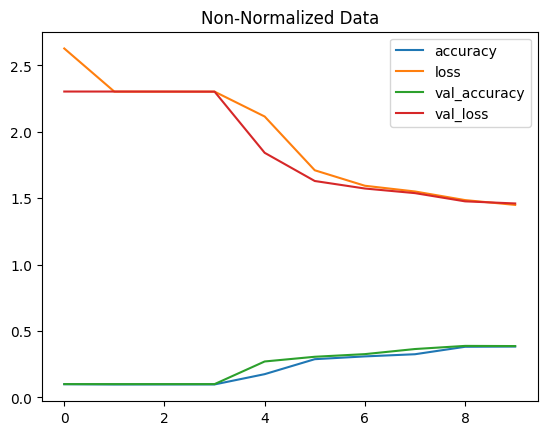

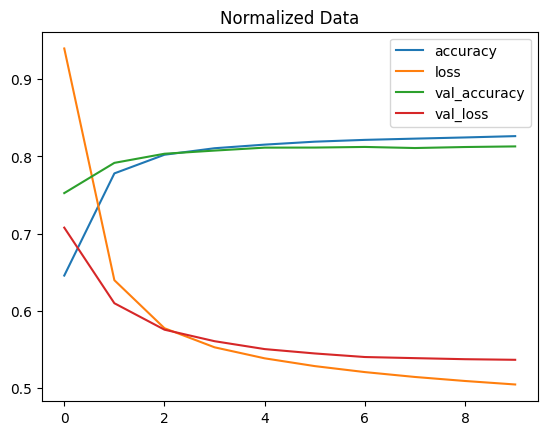

In [220]:
import pandas as pd

pd.DataFrame(non_norm_hist.history).plot(title = "Non-Normalized Data")

pd.DataFrame(norm_history.history).plot(title = "Normalized Data")

## Finding the ideal Learnign Rate

In [222]:
# Now lets build a model with the normalized data:

tf.random.set_seed(42)  # For reproducibility

model_13 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(4, activation= "relu"),
    tf.keras.layers.Dense(10, activation= "softmax")
])
model_13.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

find_lr_history = model_13.fit(train_data_norm,
                            train_labels,
                            epochs = 40,
                            validation_data = (test_data_norm, test_labels),
                            callbacks = [lr_scheduler])

/Users/alejandrocortes/opt/miniconda3/envs/alex/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.3728 - loss: 1.6330 - val_accuracy: 0.6183 - val_loss: 0.9625 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.6790 - loss: 0.8302 - val_accuracy: 0.7758 - val_loss: 0.6447 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.7852 - loss: 0.6176 - val_accuracy: 0.7885 - val_loss: 0.6111 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.7989 - loss: 0.5834 - val_accuracy: 0.7902 - val_loss: 0.5983 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8059 - loss: 0.5651 - val_accuracy: 0.7941 - val_loss: 0.5901 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8108 - loss: 0.5526 - val_accuracy: 0.7988 - val_loss: 0.5829 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.8

Text(0.5, 1.0, 'Finding Ideal Learning Rate')

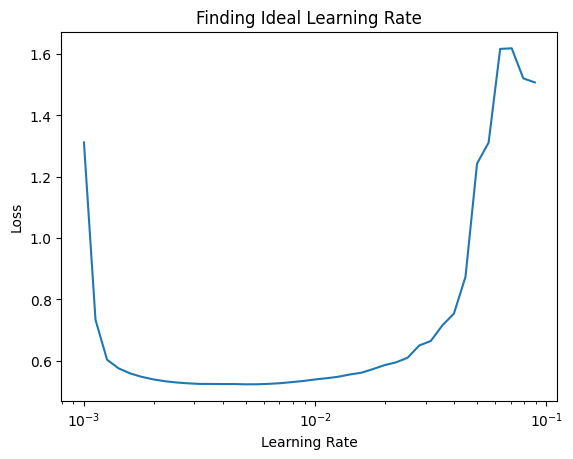

In [227]:
# Plot the learning curve

import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs,find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding Ideal Learning Rate")

In [223]:
# So basically our ideal learning rate is around 0.001 which is already Adam's default learning rate, so basically model_12 was a pretty decent model already with a good learning rate.

## Evaluating our multiclass classification model

In [228]:
# Create a confusion matrix!:

import itertools
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes = None, figsize = (10,10), text_size = 15):
    figsize = (10, 10)

    # Create the confusion matrix
    cm = confusion_matrix(y_true, tf.round(y_pred))
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
    n_classes = cm.shape[0]

    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])

    # Label the axes
    ax.set(title="Confusion Matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

    # Set x-axis labels to bottom
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    # Adjust label size
    ax.xaxis.label.set_size(text_size)
    ax.yaxis.label.set_size(text_size)
    ax.title.set_size(text_size)

    # Set threshold for different colors
    threshold = (cm.max() + cm.min()) / 2.

    # Plot the text on each cell
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
                horizontalalignment="center",
                color="white" if cm[i, j] > threshold else "black",
                size=text_size)

In [238]:
# Predicting:

y_probs = model_12.predict(test_data_norm)
y_probs

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[4.4568150e-08, 1.2455400e-14, 1.3809960e-09, ..., 6.1404191e-02,
        2.3262445e-03, 7.8084922e-01],
       [1.0399375e-03, 4.7535468e-05, 8.1855804e-01, ..., 6.3154345e-33,
        1.6840769e-06, 0.0000000e+00],
       [1.9312870e-06, 9.9895811e-01, 2.7111757e-05, ..., 9.3494582e-33,
        4.4585429e-12, 0.0000000e+00],
       ...,
       [8.9564463e-03, 1.7972471e-07, 1.7627972e-04, ..., 9.6616198e-08,
        8.8015521e-01, 1.4980993e-12],
       [1.0986624e-05, 9.8891801e-01, 3.2384189e-05, ..., 9.9113026e-25,
        1.9192996e-09, 1.4386192e-31],
       [1.5207184e-04, 1.2616705e-07, 4.5115332e-05, ..., 1.1061985e-02,
        1.6166365e-02, 1.4120174e-02]], dtype=float32)

In [239]:
y_probs[0], y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(array([4.4568150e-08, 1.2455400e-14, 1.3809960e-09, 2.2621178e-08,
        2.5228047e-08, 1.5541907e-01, 1.1972144e-06, 6.1404191e-02,
        2.3262445e-03, 7.8084922e-01], dtype=float32),
 9,
 'Ankle boot')

In [240]:
y_preds = y_probs.argmax(axis=1)
y_preds

array([9, 2, 1, ..., 8, 1, 5])

In [241]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true= test_labels, y_pred= y_preds)

array([[721,  10,  31,  93,   5,   3, 121,   0,  16,   0],
       [  0, 949,  11,  31,   4,   0,   3,   0,   2,   0],
       [ 13,   6, 725,  13, 141,   0,  98,   0,   4,   0],
       [ 24,  23,   8, 873,  31,   2,  32,   0,   7,   0],
       [  0,   3, 148,  44, 738,   0,  61,   0,   6,   0],
       [  1,   0,   0,   0,   0, 910,   0,  46,   1,  42],
       [126,   6, 142,  76, 145,   1, 488,   1,  15,   0],
       [  0,   0,   0,   0,   0,  50,   0, 910,   0,  40],
       [  1,   2,   2,  13,   8,   9,  59,   7, 899,   0],
       [  0,   0,   0,   0,   0,  30,   0,  52,   2, 916]])

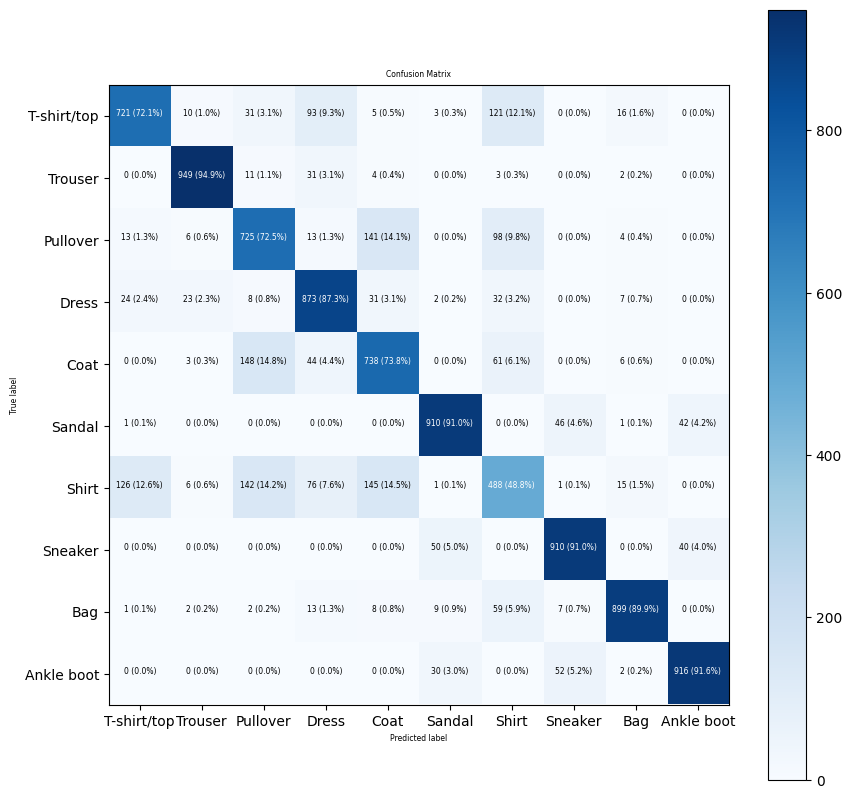

In [247]:
# Make our more pretty confusion matrix:

make_confusion_matrix(y_true = test_labels,
                      y_pred = y_preds,
                      classes = class_names,
                      figsize = (15,15),
                      text_size= 5.5)

In [259]:
import random

def plot_random_image(model, images, true_labels, classes):

    #Set up a random integer
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1,28,28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image
    plt.imshow(target_image, cmap = plt.cm.binary)

    # Chage color if it is wrong or right prediction
    if pred_label == true_label:
        color = "green"
    else:
        color = "red"

    # Add xlabel information
    plt.xlabel("Pred: {} {:2.0f}% (True: {}))".format(pred_label,
                                                      100*tf.reduce_max(pred_probs),
                                                      true_label),
                color = color)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


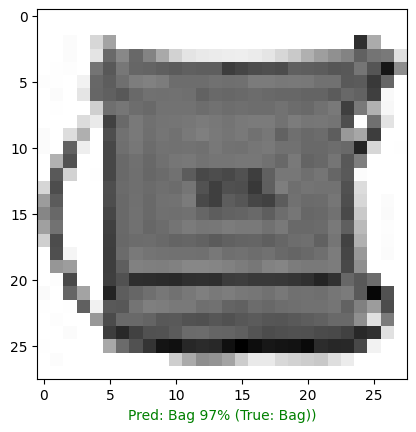

In [282]:
plot_random_image(model = model_12,
                  images = test_data_norm,
                  true_labels = test_labels,
                  classes = class_names)

### What patterns is our model learning?

In [286]:
# Find the layers of our model:

model_12.layers

[<Flatten name=flatten_8, built=True>,
 <Dense name=dense_133, built=True>,
 <Dense name=dense_134, built=True>,
 <Dense name=dense_135, built=True>]

In [285]:
# Extract a particular layer

model_12.layers[1]

<Dense name=dense_133, built=True>

In [288]:
# Get the patterns of a layer:

weights, biases = model_12.layers[1].get_weights()

weights, weights.shape

(array([[ 0.22446905, -0.30413172,  0.20067881,  0.19187076],
        [-0.19048159, -0.35591036,  0.37882718,  0.36107308],
        [-0.23222458, -0.5839951 ,  0.5046484 ,  0.3032225 ],
        ...,
        [-0.15688689, -0.14239521,  0.16237932, -0.13537906],
        [ 0.44620916, -0.02097043, -0.01352539, -0.68976676],
        [ 0.31820357, -0.18756068,  0.20033102, -0.34374627]],
       dtype=float32),
 (784, 4))

In [289]:
28*28

784

In [290]:
model_12.summary()

Model: "sequential_51"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_8 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_133 (Dense)               │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [291]:
# Let's check out the bias vector

biases, biases.shape

(array([0.04584992, 0.2912108 , 0.01809502, 0.31189752], dtype=float32), (4,))

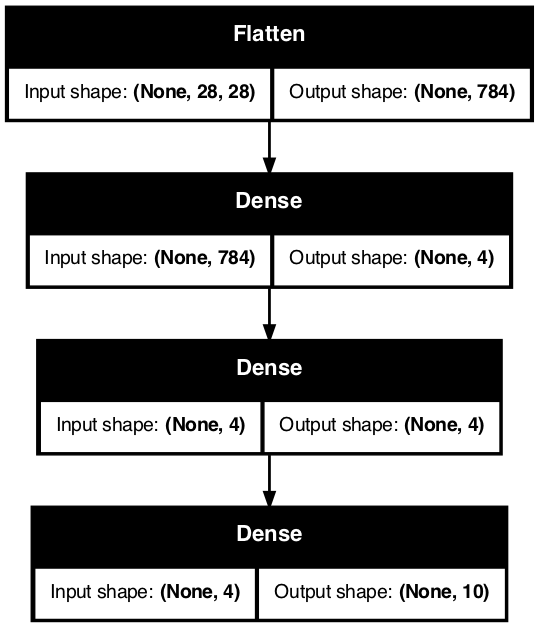

In [296]:
# Another way of visualizing our deep learning model

from tensorflow.keras.utils import plot_model
plot_model(model_12, show_shapes = True, dpi = 100) 

# FINISHED YAY

#### some exercises if you wish:

https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises